Install Libraries and Upload Image

In [3]:
!pip install opencv-python matplotlib --quiet

from google.colab import files
uploaded = files.upload()

Saving images.jpg to images (1).jpg


Import Libraries

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def show_gray(img, title="Image"):
    plt.imshow(img, cmap='gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

def show_color(img, title="Image"):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

Task 1 – Reduce Intensity Levels

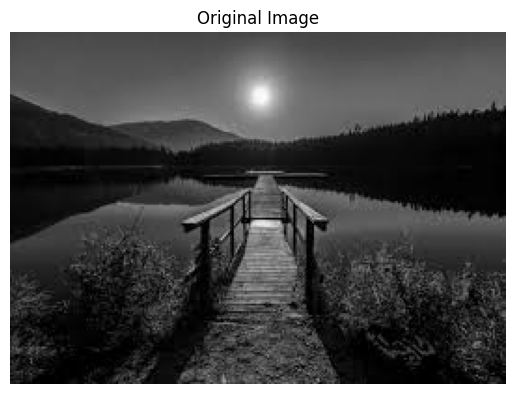

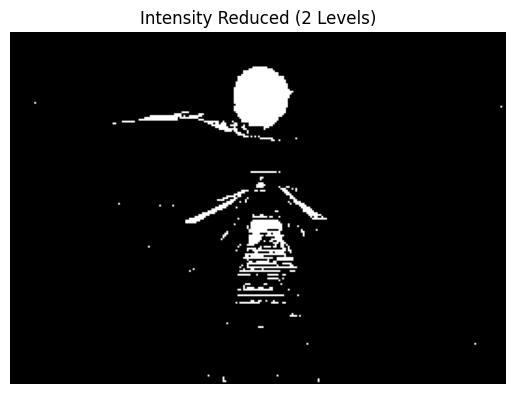

In [5]:
def reduce_intensity_levels(image_path, levels):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    factor = 256 // levels
    reduced = (img // factor) * factor
    return img, reduced

img_path = list(uploaded.keys())[0]
original, reduced = reduce_intensity_levels(img_path, 2)

show_gray(original, "Original Image")
show_gray(reduced, "Intensity Reduced (2 Levels)")


Task 2 – 3x3, 10x10, 20x20 Average Filter

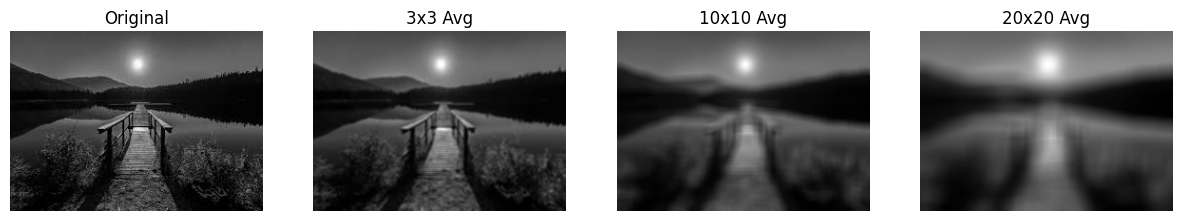

In [6]:
def average_filter(image_path, kernel_sizes=[3, 10, 20]):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
    results = []
    for k in kernel_sizes:
        blurred = cv2.blur(img, (k, k))
        results.append((k, blurred))
    return img, results

img, filtered = average_filter(img_path)

plt.figure(figsize=(15, 4))
plt.subplot(1, 4, 1), plt.imshow(img, cmap='gray'), plt.title('Original'), plt.axis('off')
for i, (k, f) in enumerate(filtered):
    plt.subplot(1, 4, i+2), plt.imshow(f, cmap='gray'), plt.title(f'{k}x{k} Avg'), plt.axis('off')
plt.show()

Task 3 – Rotate Image 45° and 90°

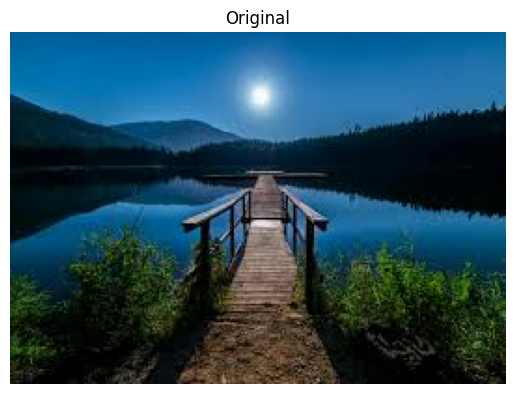

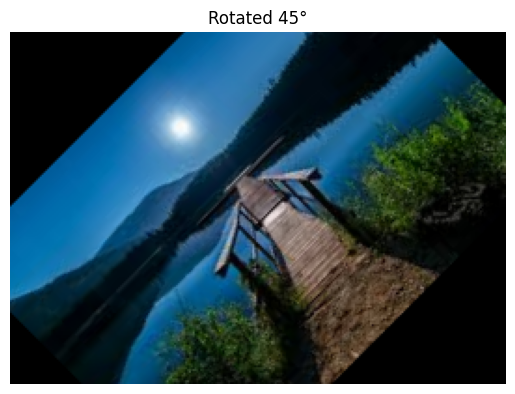

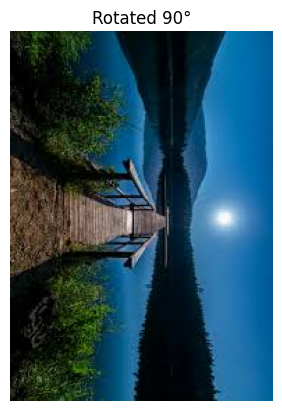

In [7]:
def rotate_image(image_path):
    img = cv2.imread(image_path)
    rows, cols = img.shape[:2]

    # Rotate 45 degrees
    M_45 = cv2.getRotationMatrix2D((cols/2, rows/2), 45, 1)
    rotated_45 = cv2.warpAffine(img, M_45, (cols, rows))

    # Rotate 90 degrees
    rotated_90 = cv2.rotate(img, cv2.ROTATE_90_CLOCKWISE)

    return img, rotated_45, rotated_90

orig, rot_45, rot_90 = rotate_image(img_path)

show_color(orig, "Original")
show_color(rot_45, "Rotated 45°")
show_color(rot_90, "Rotated 90°")

 Task 4 – Block Averaging (Resolution Reduction)

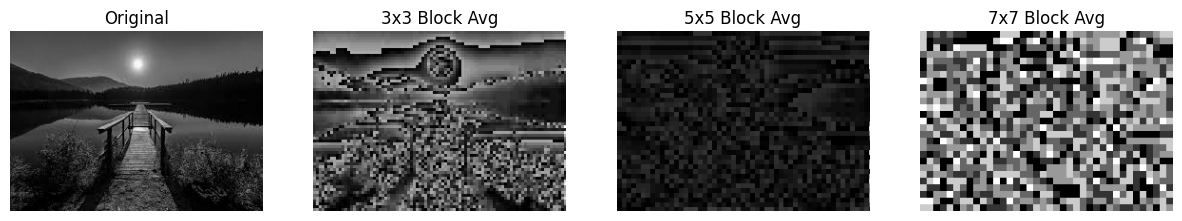

In [8]:
def block_average(img, block_size):
    h, w = img.shape
    new_img = img.copy()
    for i in range(0, h, block_size):
        for j in range(0, w, block_size):
            block = img[i:i+block_size, j:j+block_size]
            avg = np.mean(block, dtype=np.uint8)
            new_img[i:i+block_size, j:j+block_size] = avg
    return new_img

img_gray = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
block_sizes = [3, 5, 7]

plt.figure(figsize=(15, 4))
plt.subplot(1, 4, 1), plt.imshow(img_gray, cmap='gray'), plt.title('Original'), plt.axis('off')
for i, b in enumerate(block_sizes):
    reduced = block_average(img_gray, b)
    plt.subplot(1, 4, i+2), plt.imshow(reduced, cmap='gray'), plt.title(f'{b}x{b} Block Avg'), plt.axis('off')
plt.show()